# Decision Tree

### Information about the Dataset -
**3 Classes** : 3 different types of Wheat Seed 

| Class | Seed Type | Count |
| ----- | --------- | ----- |
| 1  | Kama | 66 |
| 2  | Rosa | 68
| 3  | Canadian | 65 |

**7 Features :**
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 

**Problem:** Based on 7 features, predict 3 different classes.

In [1]:
#importing all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
import utils9

In [2]:
seed = 1

In [3]:
# reading the csv file into pandas dataframe called seeds

seeds = pd.read_csv("seeds.csv")
seeds

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [5]:
#displaying some stats about the data

seeds.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [6]:
# declaring features and labels 

features = seeds.drop("Type", axis = 1)  
labels = seeds["Type"]

I tried different proportions like:
1. 80% train, 10% test, 10% val
2. 70% train, 20% test, 10% val
3. 70% train, 15% test, 15% val
3. 60% train, 20% test, 20% val

Out of these, I choose 3. with:

**Training Set = 70%**,
**Testing Set = 15%**,
**Validation Set = 15%**

This proportion provides enough data for testing and validation in a way that, Training, Testing and Validation accuracies are all adequtely high in relation to each other.

In [7]:
# splitting data into training, testing and validation datasets

# training and testing 
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.15, random_state = seed)

# training and validation 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.15, random_state = seed)

### Trying Gini impurity index to create branches.

In [8]:
# creating a decision tree classifier 'seeds_dt' based on gini impurity index and training it on training data

seeds_dt = DecisionTreeClassifier(criterion = 'gini', random_state = seed)
seeds_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

[Text(209.25000000000003, 201.90857142857143, 'X[6] <= 5.576\ngini = 0.666\nsamples = 143\nvalue = [46, 49, 48]'),
 Text(139.5, 170.84571428571428, 'X[0] <= 13.42\ngini = 0.499\nsamples = 93\nvalue = [45, 0, 48]'),
 Text(111.60000000000001, 139.78285714285715, 'X[6] <= 4.826\ngini = 0.266\nsamples = 57\nvalue = [9, 0, 48]'),
 Text(55.800000000000004, 108.72, 'X[1] <= 12.8\ngini = 0.278\nsamples = 6\nvalue = [5, 0, 1]'),
 Text(27.900000000000002, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(83.7, 77.65714285714284, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(167.4, 108.72, 'X[5] <= 1.538\ngini = 0.145\nsamples = 51\nvalue = [4, 0, 47]'),
 Text(139.5, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(195.3, 77.65714285714284, 'X[1] <= 13.665\ngini = 0.113\nsamples = 50\nvalue = [3, 0, 47]'),
 Text(167.4, 46.59428571428572, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]'),
 Text(223.20000000000002, 46.59428571428572, 'X[6] <= 5.154\

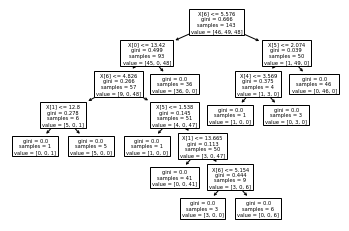

In [9]:
# plotting the tree for seeds_dt 

tree.plot_tree(seeds_dt)

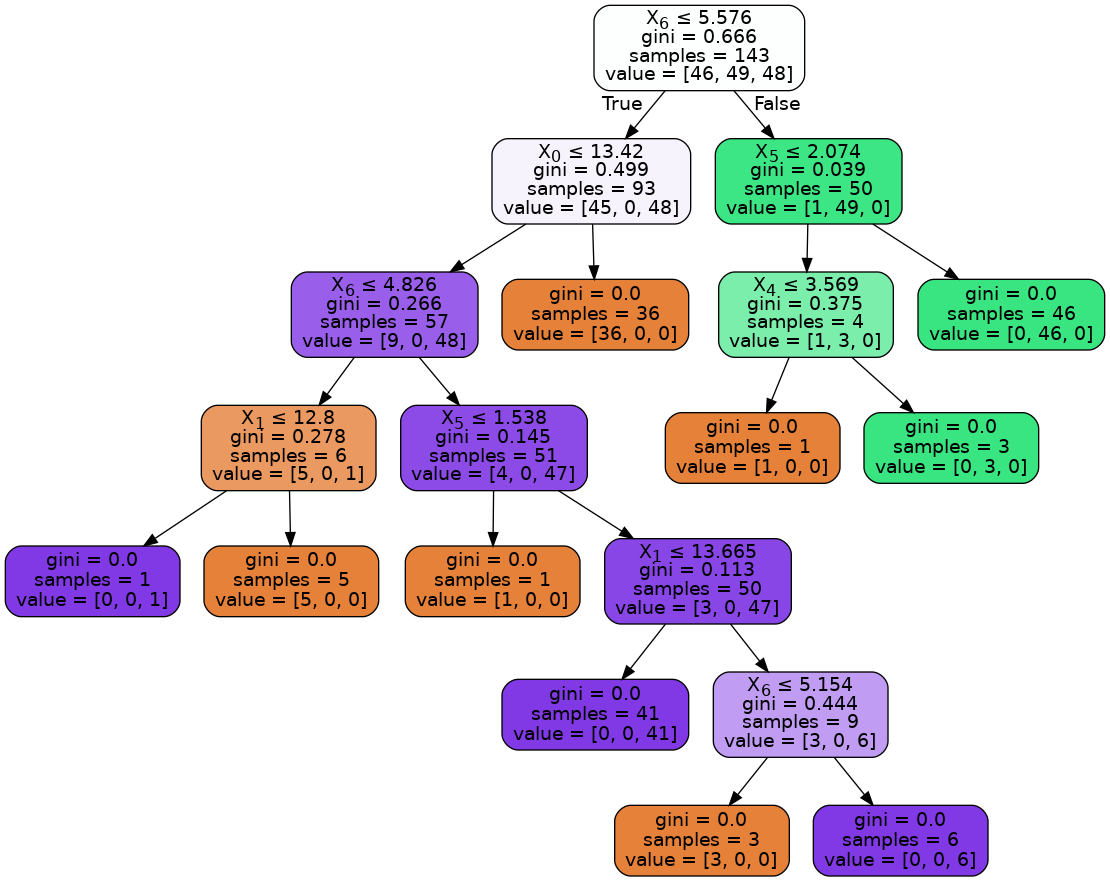

In [10]:
# displaying the decision tree 'seeds_dt'

utils9.display_tree(seeds_dt)

In [11]:
# getting the scores (training, validation and testing) of the seeds_dt classifier 

print("Training Accuracy:", seeds_dt.score(x_train, y_train))
print("Validation Accuracy:", seeds_dt.score(x_val, y_val))
print("Testing Accuracy:", seeds_dt.score(x_test, y_test))

Training Accuracy: 1.0
Validation Accuracy: 0.9230769230769231
Testing Accuracy: 0.9


### Trying entropy to create branches.

In [12]:
# creating a decision tree classifier 'seeds_dt_entropy' based on entropy and training it on training data

seeds_dt_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = seed)
seeds_dt_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

[Text(213.05454545454546, 203.85, 'X[6] <= 5.576\nentropy = 1.584\nsamples = 143\nvalue = [46, 49, 48]'),
 Text(152.1818181818182, 176.67000000000002, 'X[0] <= 13.42\nentropy = 0.999\nsamples = 93\nvalue = [45, 0, 48]'),
 Text(121.74545454545455, 149.49, 'X[5] <= 4.168\nentropy = 0.629\nsamples = 57\nvalue = [9, 0, 48]'),
 Text(91.30909090909091, 122.31, 'X[6] <= 4.826\nentropy = 0.993\nsamples = 20\nvalue = [9, 0, 11]'),
 Text(60.872727272727275, 95.13, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(121.74545454545455, 95.13, 'X[1] <= 13.71\nentropy = 0.837\nsamples = 15\nvalue = [4, 0, 11]'),
 Text(91.30909090909091, 67.94999999999999, 'X[5] <= 2.666\nentropy = 0.619\nsamples = 13\nvalue = [2, 0, 11]'),
 Text(60.872727272727275, 40.77000000000001, 'X[6] <= 5.009\nentropy = 0.971\nsamples = 5\nvalue = [2, 0, 3]'),
 Text(30.436363636363637, 13.590000000000003, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(91.30909090909091, 13.590000000000003, 'entropy = 0.0\nsamples

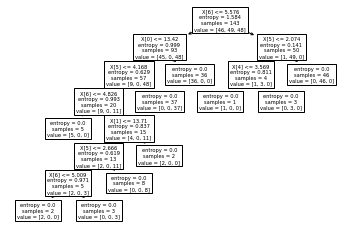

In [13]:
# plotting a tree for seeds_dt_entropy

tree.plot_tree(seeds_dt_entropy)

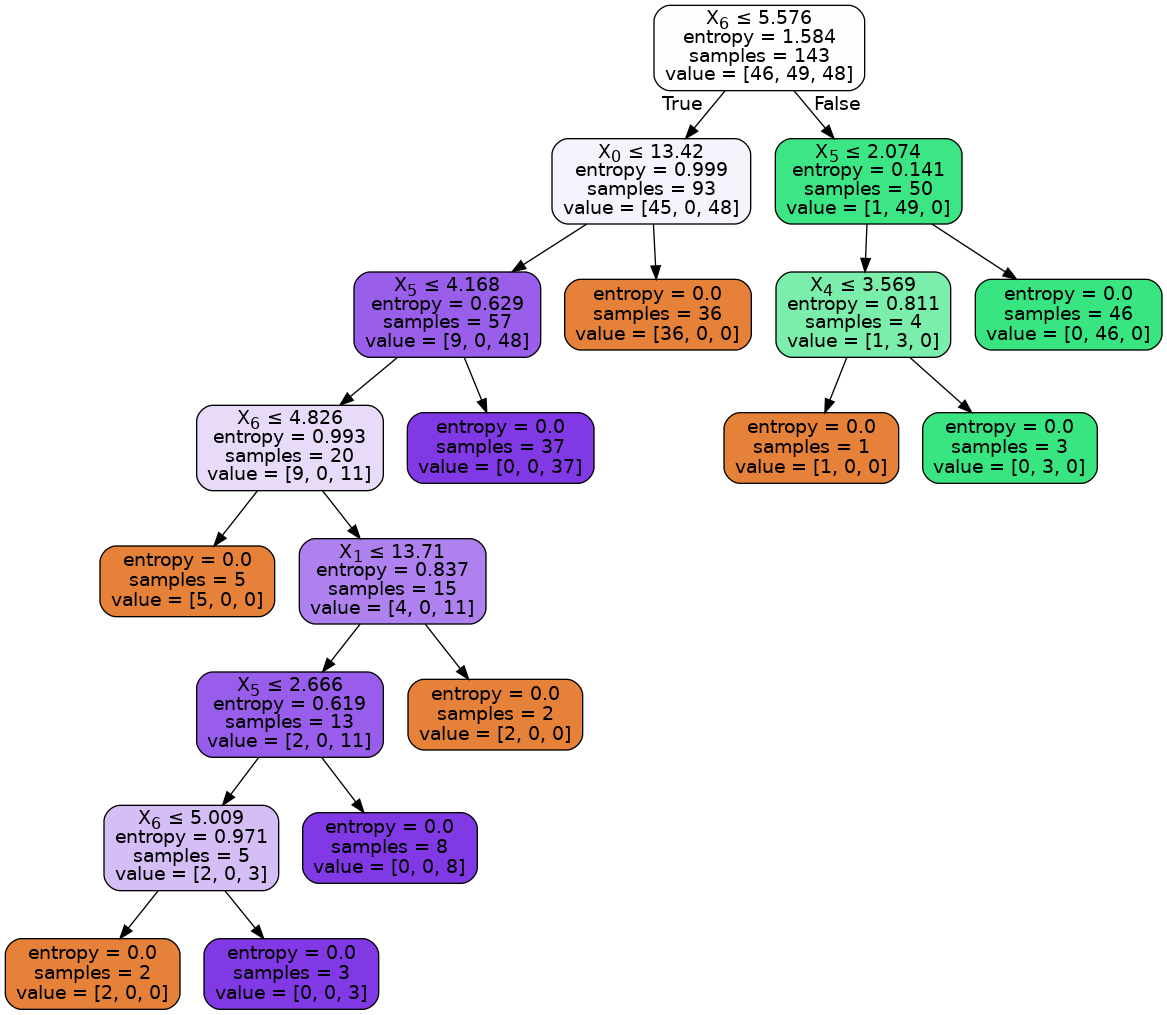

In [14]:
# displaying the decision tree 'seeds_dt_entropy'

utils9.display_tree(seeds_dt_entropy)

In [15]:
# getting the scores (training, validation and testing) of the seeds_dt_entropy classifier 

print("Training Accuracy:", seeds_dt_entropy.score(x_train, y_train))
print("Validation Accuracy:", seeds_dt_entropy.score(x_val, y_val))
print("Testing Accuracy:", seeds_dt_entropy.score(x_test, y_test))

Training Accuracy: 1.0
Validation Accuracy: 0.9615384615384616
Testing Accuracy: 0.9666666666666667


**Out of the above two decision tree classifiers, Entropy based decision tree gives better overall results in terms of accuracy. Therefore, I will proceed with that.**

### Explaination of the following hyperparameters:

**max_depth:** _This determines the maximum depth of the decision tree. It's default value is 'None', which means it will keep on splitting until all the leaves contain samples less than the minimum number._ 

**max_features:** _This determines maximum number of features to be considered each time to make the split. It's default value is 'None', which means all the n features in the dataset._ 

**min_impurity_decrease:** _It sets the threshold for the difference in impurity during the split and the difference should be higher than this to make further split. It's default value is 0.0._ 

**min_samples_leaf:** _It determines the minimum number of samples required for the node to be a leaf. It's default value is 1._ 

**min_samples_split:** _It determines the minimum number of samples that are required at the node to make the split. It's default value is 2._



### Trying differnt values of 5 hyperparameters in Entropy based decision tree model:

In [16]:
# 1.

dt_0 = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_impurity_decrease = 0.0, max_features = 6, min_samples_split = 2, min_samples_leaf = 1, random_state = seed)
dt_0.fit(x_train, y_train)
print("Training Accuracy:", dt_0.score(x_train, y_train))
print("Validation Accuracy:", dt_0.score(x_val, y_val))

Training Accuracy: 1.0
Validation Accuracy: 0.9615384615384616


In [17]:
# 2.

'''dt_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_impurity_decrease = 0.0, max_features = None, min_samples_split = 5, min_samples_leaf = 6, random_state = seed)
dt_1.fit(x_train, y_train)
print("Training Accuracy:", dt_1.score(x_train, y_train))
print("Validation Accuracy:", dt_1.score(x_val, y_val))'''

'dt_1 = DecisionTreeClassifier(criterion = \'entropy\', max_depth = None, min_impurity_decrease = 0.0, max_features = None, min_samples_split = 5, min_samples_leaf = 6, random_state = seed)\ndt_1.fit(x_train, y_train)\nprint("Training Accuracy:", dt_1.score(x_train, y_train))\nprint("Validation Accuracy:", dt_1.score(x_val, y_val))'

In [18]:
# 3.

'''dt_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_impurity_decrease = 0.1, max_features = 5, min_samples_split = 5, min_samples_leaf = 4, random_state = seed)
dt_2.fit(x_train, y_train)
print("Training Accuracy:", dt_2.score(x_train, y_train))
print("Validation Accuracy:", dt_2.score(x_val, y_val))'''

'dt_2 = DecisionTreeClassifier(criterion = \'entropy\', max_depth = None, min_impurity_decrease = 0.1, max_features = 5, min_samples_split = 5, min_samples_leaf = 4, random_state = seed)\ndt_2.fit(x_train, y_train)\nprint("Training Accuracy:", dt_2.score(x_train, y_train))\nprint("Validation Accuracy:", dt_2.score(x_val, y_val))'

In [19]:
# 4.

'''dt_3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_impurity_decrease = 0.01, max_features = None, min_samples_split = 3, min_samples_leaf = 5, random_state = seed)
dt_3.fit(x_train, y_train)
print("Training Accuracy:", dt_3.score(x_train, y_train))
print("Validation Accuracy:", dt_3.score(x_val, y_val))'''

'dt_3 = DecisionTreeClassifier(criterion = \'entropy\', max_depth = 5, min_impurity_decrease = 0.01, max_features = None, min_samples_split = 3, min_samples_leaf = 5, random_state = seed)\ndt_3.fit(x_train, y_train)\nprint("Training Accuracy:", dt_3.score(x_train, y_train))\nprint("Validation Accuracy:", dt_3.score(x_val, y_val))'

In [20]:
# 5.

'''dt_4 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_impurity_decrease = 0.1, max_features = None, min_samples_split = 2, min_samples_leaf = 5, random_state = seed)
dt_4.fit(x_train, y_train)
print("Training Accuracy:", dt_4.score(x_train, y_train))
print("Validation Accuracy:", dt_4.score(x_val, y_val))'''

'dt_4 = DecisionTreeClassifier(criterion = \'entropy\', max_depth = 4, min_impurity_decrease = 0.1, max_features = None, min_samples_split = 2, min_samples_leaf = 5, random_state = seed)\ndt_4.fit(x_train, y_train)\nprint("Training Accuracy:", dt_4.score(x_train, y_train))\nprint("Validation Accuracy:", dt_4.score(x_val, y_val))'

**Comparing different decision tree models**



| model | criterion | max_depth | min_impurity_decrease | max_features | min_samples_split | min_samples_leaf | Training Accuracy | Validation Accuracy |
| ----- | --------- | --------- | --------------------- | ------------ | ----------------- | ---------------- | ----------------- | ------------------- | 
| seeds_dt_entropy | entropy |   None(7) | 0.0 | None(7) | 2 | 1 | 1.0 | 0.96 |
| dt_0 | entropy | None(7) | 0.0 | 6 | 2 | 1 | 1.0 | 0.96 | 
| dt_1 | entropy | None(7) | 0.0 | None(7) | 5 | 6 | 0.97 | 0.89 |
| dt_2 | entropy | None(7) | 0.1 | 5 | 5 | 4 | 0.93 | 0.96 | 
| dt_3 | entropy | 5 | 0.01 | None(7) | 3 | 5 | 0.97 | 0.92 |
| dt_4 | entropy | 4 | 0.1 | None(7) | 2 | 5 | 0.93 | 0.96 | 



Based on the Training and validation accuracies, **decision tree model with default values of all the hyperparameters (seeds_dt_entropy) and the model with all default values except only the max_features = 6 (originally, 7) (dt_0) give best validation accuracies along with 100% training accuracies.**
Choice of the values for the hyperparameters can be seen in the above table.

**The validation accuracy being the highest among all and 100% Training accuracy at the same time for both models are enough to prove that these values of the hyperparameters are best out of all.**

In [21]:
# getting the scores (training, validation and testing) of the seeds_dt_entropy classifier 

print("Training Accuracy:", seeds_dt_entropy.score(x_train, y_train))
print("Validation Accuracy:", seeds_dt_entropy.score(x_val, y_val))
print("Testing Accuracy:", seeds_dt_entropy.score(x_test, y_test))
print(" ")
# getting scores (Training, Validation and Testing) for dt_0

print("Training Accuracy:", dt_0.score(x_train, y_train))
print("Validation Accuracy:", dt_0.score(x_val, y_val))
print("Testing Accuracy:", dt_0.score(x_test, y_test))

Training Accuracy: 1.0
Validation Accuracy: 0.9615384615384616
Testing Accuracy: 0.9666666666666667
 
Training Accuracy: 1.0
Validation Accuracy: 0.9615384615384616
Testing Accuracy: 0.9666666666666667


**Since, all three (training, validation and testing) accuracies of these decision tree classifiers are significantly high, it means that these are doing what they are supposed to. Both models are neither underfitting nor overfitting.** 

**The depth of both models is the same as the default depth.**

### I pick seeds_dt_entropy which considers all features for the classification

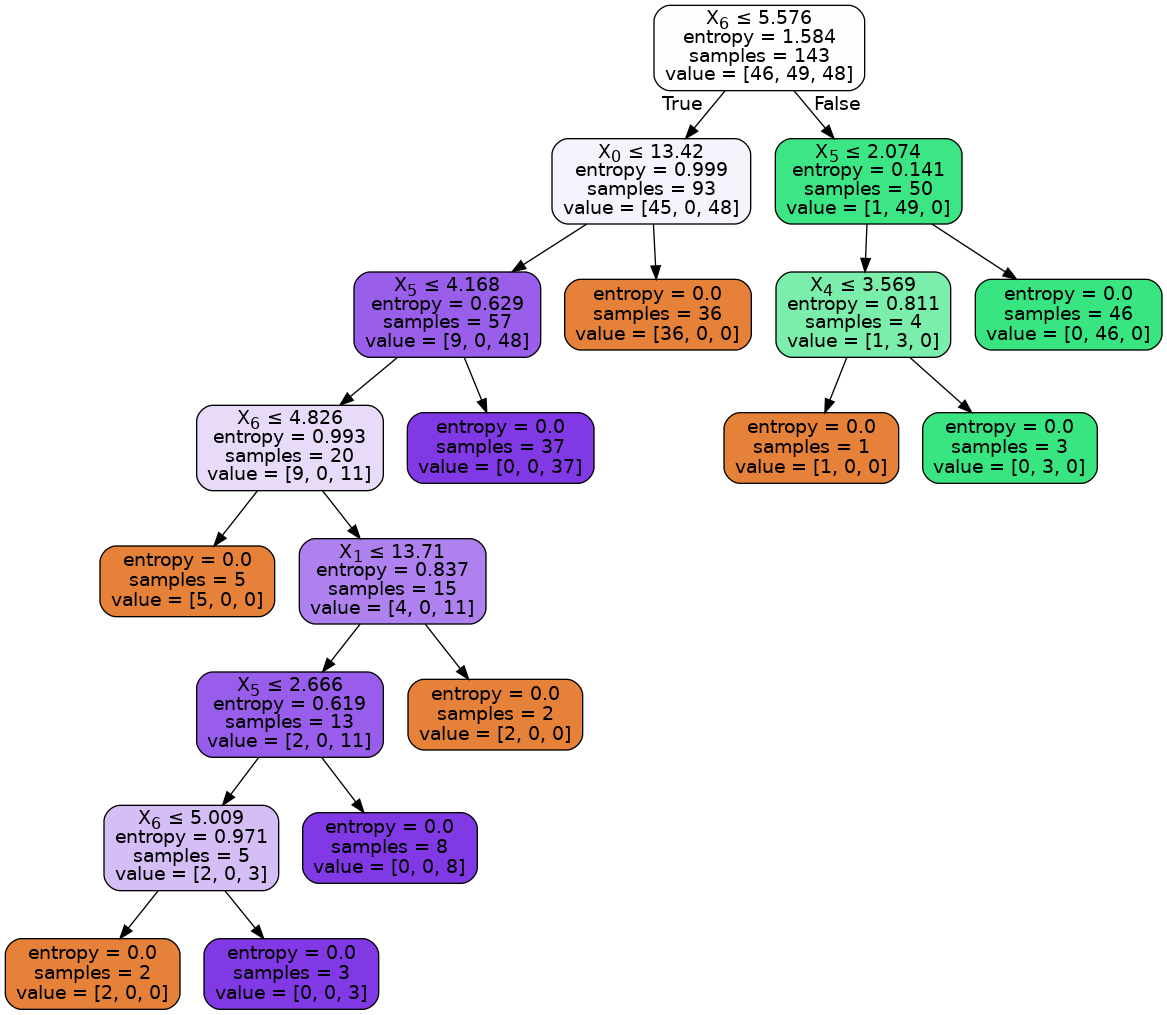

In [22]:
# displaying the decision tree for the trained model (seeds_dt_entropy)

utils9.display_tree(seeds_dt_entropy)

In [23]:
# predicting classes for within the test data using the trained model

seeds_dt_entropy.predict(x_test)

array([3, 1, 1, 2, 3, 3, 2, 1, 1, 3, 1, 3, 1, 3, 3, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 3, 1, 1, 3, 1])

In [24]:
# the mean accuracy of the predictions

print("Testing Accuracy:", seeds_dt_entropy.score(x_test, y_test))

Testing Accuracy: 0.9666666666666667


# Quantitative Analysis of the Decision Tree Algorithm

### My final decision tree model is seeds_dt_entropy with all the hyperparameters with their default values.


In [25]:
# accuracy for the training, validation and testing sets for seeds_dt_entropy

print("Training Accuracy:", seeds_dt_entropy.score(x_train, y_train))
print("Validation Accuracy:", seeds_dt_entropy.score(x_val, y_val))
print("Testing Accuracy:", seeds_dt_entropy.score(x_test, y_test))

Training Accuracy: 1.0
Validation Accuracy: 0.9615384615384616
Testing Accuracy: 0.9666666666666667


In [26]:
# confusion matrix for the training set

confusion_matrix(y_test, seeds_dt_entropy.predict(x_test))

array([[15,  0,  1],
       [ 0,  6,  0],
       [ 0,  0,  8]])

**From the above confusion matrix, it can be observed that Class 1 (Type 1 seed) has not been perfectly predicted always. It has been falsely classified as Type 3 seed once. This gives the testing accuracy as 97%. So, this is the worst error in my case.** 